In [95]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

fname = '/Users/macbookpro/Downloads/1.png'

im = cv2.imread(fname)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

_, im_bw = cv2.threshold(im_gray,195,255,cv2.THRESH_BINARY)

In [97]:
elips_spoon = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (75, 75))
erode_spoon = cv2.erode(im_bw, elips_spoon, iterations=1)

stats = cv2.connectedComponentsWithStats(erode_spoon)
print(f"Ложки кол-во = {stats[0] - 1}")

Ложки кол-во = 4


In [98]:
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 45))
outline_thresholds = cv2.subtract(im_bw, erode_spoon)

erode = cv2.erode(outline_thresholds, rect, iterations=1)
dilate = cv2.dilate(erode, rect, iterations=1)

stats = cv2.connectedComponentsWithStats(dilate)
print(f"Сахар кол-во = {stats[0] - 1}")

Сахар кол-во = 5


 Всего = 9


Text(0.5, 1.0, 'marked')

<Figure size 432x288 with 0 Axes>

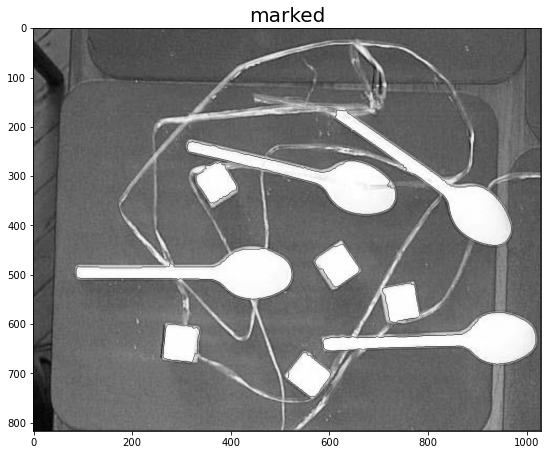

In [99]:
elips = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

erode = cv2.erode(im_bw, elips, iterations=1)
dilate = cv2.dilate(erode, elips, iterations=1)

outline_thresholds = cv2.subtract(dilate, erode)
stats = cv2.connectedComponentsWithStats(dilate)
print(f" Всего = {stats[0] - 1}")
# # Для того что бы фон был не 0
markers = stats[1]
markers = markers + 1
markers[outline_thresholds == 255] = 0

w = cv2.watershed(im, markers)
# -1 граница
im_gray[w == -1] = [2]



plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im_gray, cmap='gray')
plt.title('marked', size=20)